In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# fig = plt.figure(figsize=(10,15))
# sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

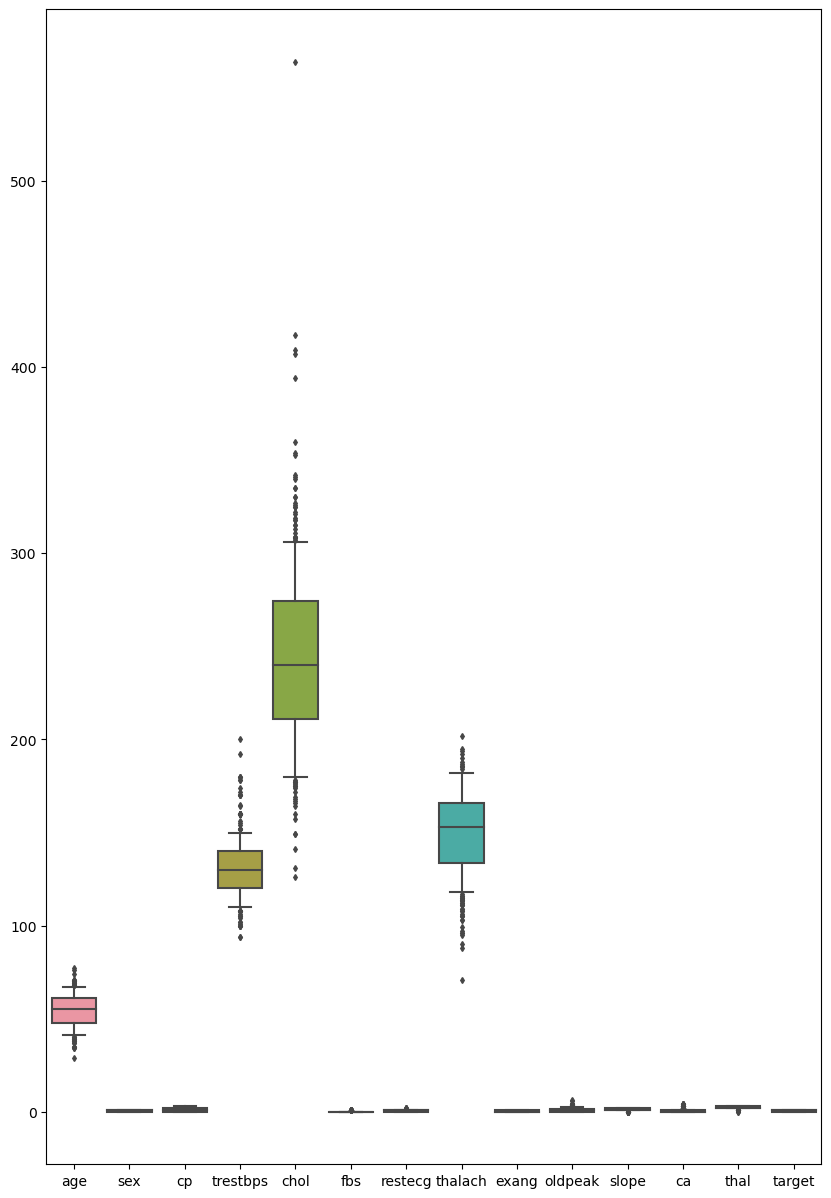

In [8]:
fig = plt.figure(figsize=(10,15))
sns.boxplot(data=df,whis=0.5,fliersize=3)

In [9]:
# Independent and dependent 
x = df.iloc[:,:-1]
y = df["target"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [12]:
x_train.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.076955,-0.127758,0.288078,0.247557,0.121209,-0.165419,-0.404615,0.161146,0.204483,-0.151790,0.330450,0.081448
sex,-0.076955,1.000000,-0.057577,-0.110884,-0.212008,0.034951,-0.074695,-0.038822,0.151385,0.176680,-0.066913,0.169985,0.225652
cp,-0.127758,-0.057577,1.000000,0.025663,-0.072715,0.186225,-0.031449,0.317051,-0.390310,-0.165942,0.124755,-0.167850,-0.199712
trestbps,0.288078,-0.110884,0.025663,1.000000,0.146431,0.226035,-0.065109,-0.032537,0.071371,0.103757,-0.033806,0.058233,0.028320
chol,0.247557,-0.212008,-0.072715,0.146431,1.000000,0.051839,-0.118689,0.009340,0.039480,0.122876,0.014369,0.057201,0.060382
fbs,0.121209,0.034951,0.186225,0.226035,0.051839,1.000000,-0.098113,-0.013058,-0.020018,-0.002365,-0.074125,0.084714,-0.042658
restecg,-0.165419,-0.074695,-0.031449,-0.065109,-0.118689,-0.098113,1.000000,0.019833,0.002176,0.012953,0.018522,-0.082971,0.038891
thalach,-0.404615,-0.038822,0.317051,-0.032537,0.009340,-0.013058,0.019833,1.000000,-0.403342,-0.332174,0.323170,-0.260242,-0.110076
exang,0.161146,0.151385,-0.390310,0.071371,0.039480,-0.020018,0.002176,-0.403342,1.000000,0.326970,-0.284329,0.110556,0.236343
oldpeak,0.204483,0.176680,-0.165942,0.103757,0.122876,-0.002365,0.012953,-0.332174,0.326970,1.000000,-0.539355,0.235034,0.255085


In [13]:
def correlation(df,threshold):
    col_name = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname = corr_matrix.columns[i]
                col_name.add(colname)
    return col_name                                                                                                                                                                                
                

In [14]:
correlation(x_train,0.50)

set()

In [15]:
# so there is no multicollinearity in x_train

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rand_forest = RandomForestClassifier()

In [18]:
rand_forest.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
y_pred = rand_forest.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report

In [21]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8021978021978022
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [22]:
importance_scores = rand_forest.feature_importances_

In [23]:
importance_scores.sort()
print(importance_scores)

[0.01267126 0.02010348 0.03143838 0.0671125  0.06823768 0.07115687
 0.07765995 0.08980671 0.09689972 0.10148515 0.10628175 0.10639897
 0.15074758]


In [24]:
df2 = pd.DataFrame({
    'Feature' : x.columns,
    'scores' : importance_scores
})

In [25]:
df2.tail(5)

,Feature,scores
8,exang,0.096900
9,oldpeak,0.101485
10,slope,0.106282
11,ca,0.106399
12,thal,0.150748


<AxesSubplot: xlabel='Feature', ylabel='scores'>

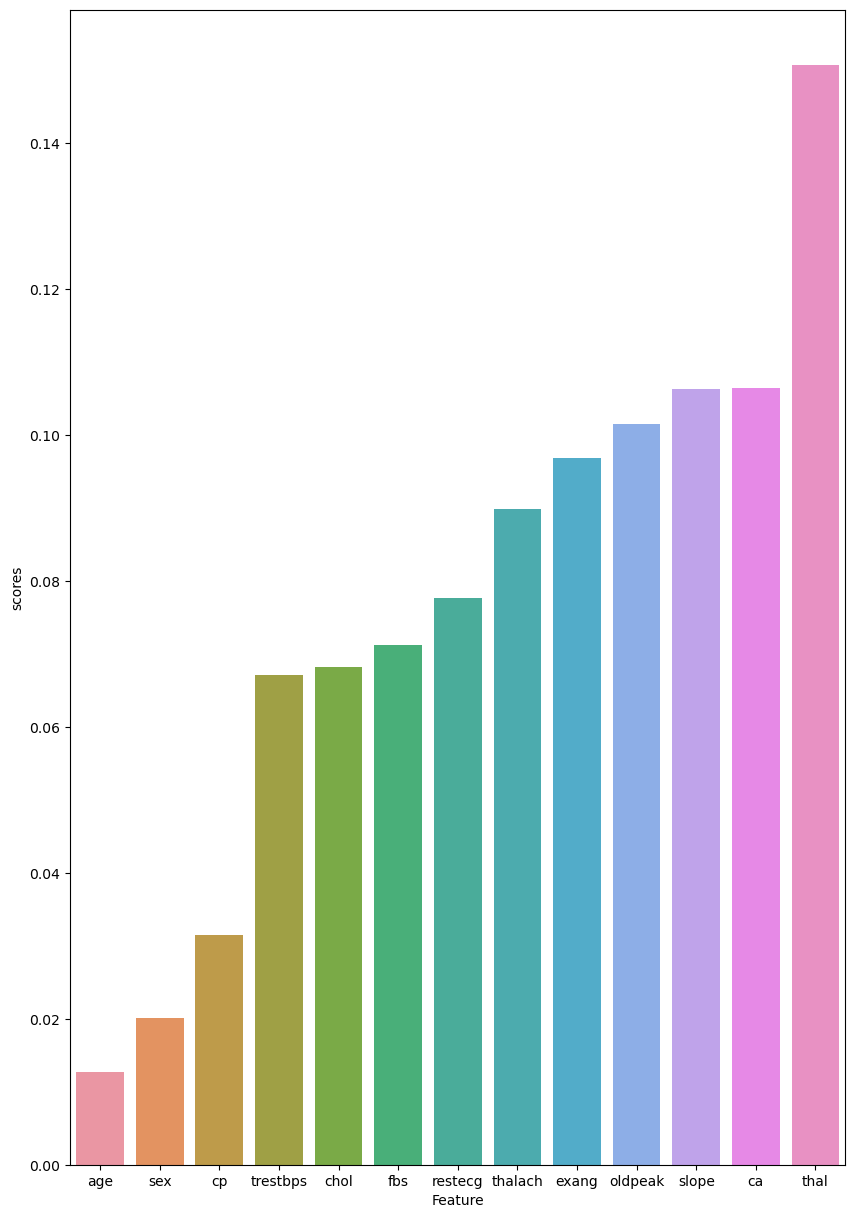

In [26]:
fig = plt.figure(figsize=(10,15))
sns.barplot(data=df2,x=df2.Feature,y=df2.scores)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameter = {
    'criterion' :['gini' , 'entropy'],
    'max_depth' : [3,5,10,None],
    'min_samples_split' : [2],
    'n_estimators':[100,200,300]
}
    

In [29]:
clf = GridSearchCV(rand_forest,param_grid=parameter,cv=5,verbose=3,scoring='accuracy')

In [30]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.738 total time=   0.4s
[CV 4/5] END criterion=gini, max_d

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [31]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [32]:
ypred = clf.predict(x_test)

In [34]:
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.8131868131868132
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


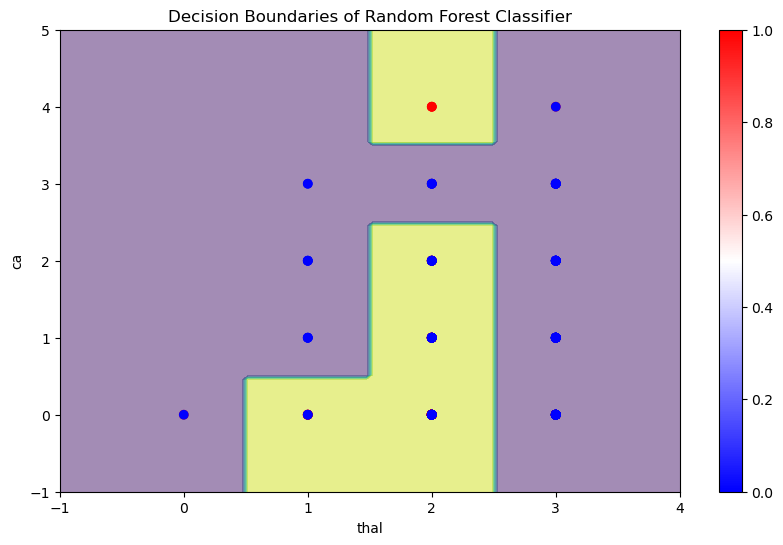

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x1 = df[['thal', 'ca']]  
y1 = df['target']  

rand_forest.fit(x1, y1)

feature1_range = np.linspace(x1['thal'].min() - 1, x1['thal'].max() + 1, 100)
feature2_range = np.linspace(x1['ca'].min() - 1, x1['ca'].max() + 1, 100)

feature1_grid, feature2_grid = np.meshgrid(feature1_range, feature2_range)

X_grid = np.c_[feature1_grid.ravel(), feature2_grid.ravel()]

predictions = rand_forest.predict(X_grid)

predictions_grid = predictions.reshape(feature1_grid.shape)

plt.figure(figsize=(10, 6))
plt.contourf(feature1_grid, feature2_grid, predictions_grid, alpha=0.5)
plt.scatter(x1['thal'], x1['ca'], c=y, cmap='bwr')
plt.xlabel('thal')
plt.ylabel('ca')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.colorbar()
plt.show()
